# 군집화(Clustering)

* 대표적인 비지도학습 알고리즘
* 레이블이 없는 데이터를 그룹화 하는 알고리즘

![clustering](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## 데이터 생성

In [ ]:
def plot_data(dataset, position, title):
  X, y = dataset
  plt.subplot(position)
  plt.title(title)
  plt.scatter(X[:, 0], X[:, 1])

In [ ]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [ ]:
circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

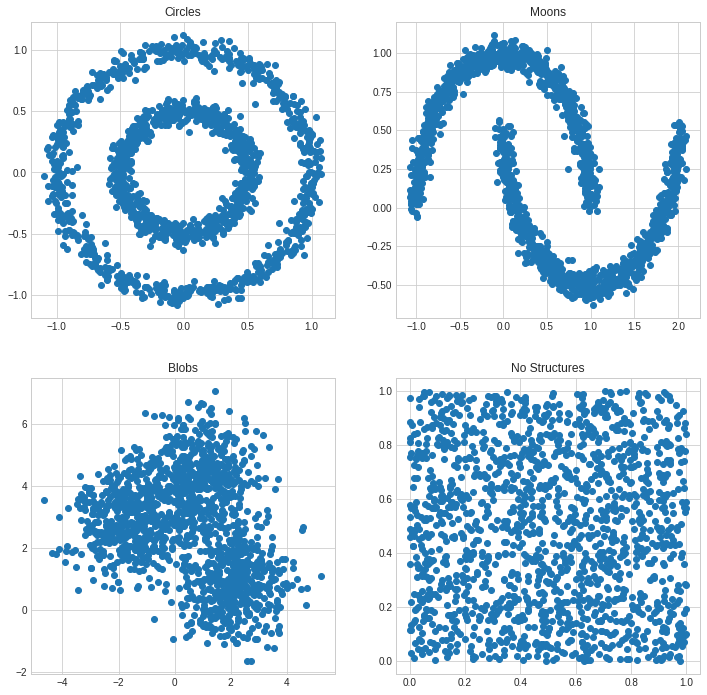

In [ ]:
plt.figure(figsize=(12, 12))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No Structures')

In [ ]:
def fit_predict_plot(model, dataset, position, title):
  X, y = dataset
  model.fit(X, y)
  if hasattr(model, 'labels_'):
    labels = model.labels_.astype(np.int)
  else:
    labels = model.predict(X)

  colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#F6B352', '#519D9E', '#D81159', '#8CD790', '#353866'])
  ax = plt.subplot(position)
  ax.set_title(title)
  ax.scatter(X[:, 0], X[:, 1], color=colors[labels])

## K-평균 (K-Means)

* n개의 등분산 그룹으로 군집화
* 제곱합 함수를 최소화
* 군집화 개수를 지정해야 한다.
* 각 군집 $C$의 평균 $\mu_j$을 중심점 이라고 함
* 다음을 만족하는 중심점을 찾는것이 목표

\begin{equation}
\sum_{i=0}^{n} \underset{\mu_j \in C}{\min} (||x_i - \mu_j||^2)
\end{equation}

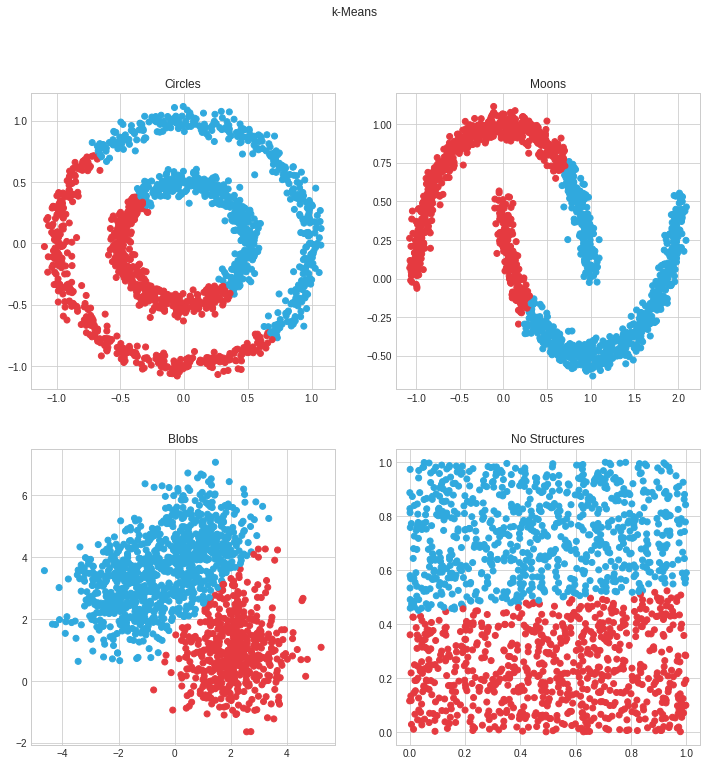

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=2, random_state=random_state), no_structures, 224, 'No Structures')

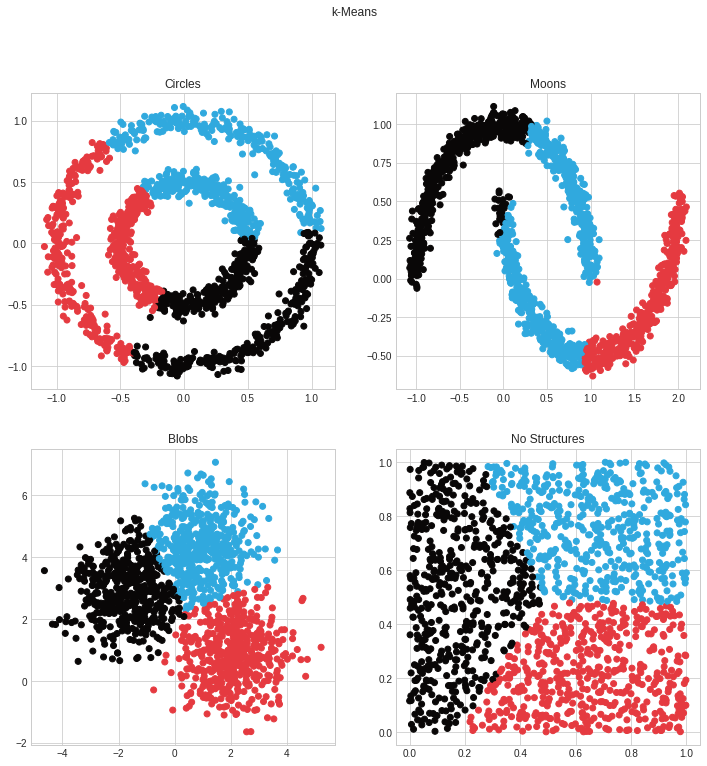

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'No Structures')

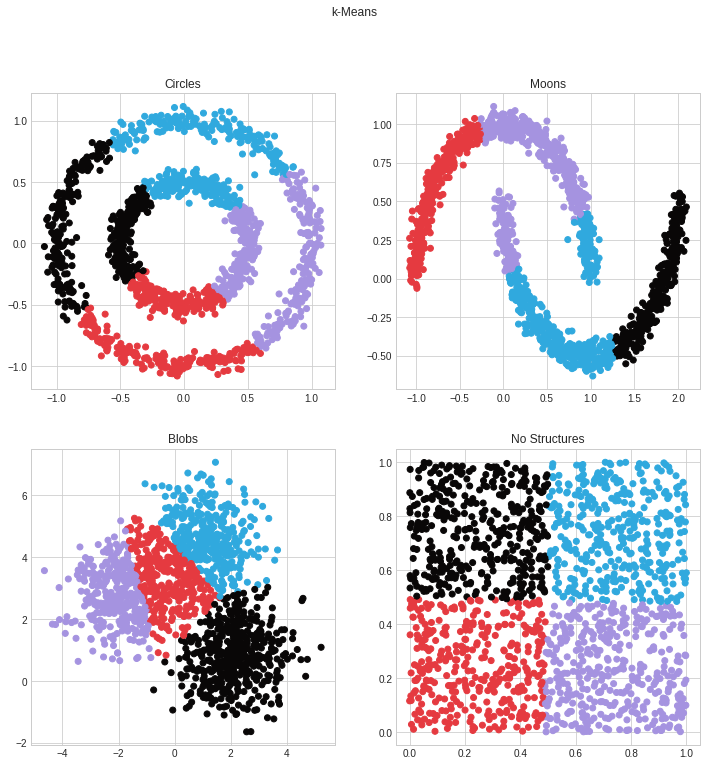

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('k-Means')

fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), no_structures, 224, 'No Structures')

### 붓꽃 데이터 군집화
* K-Means 알고리즘을 사용해 붓꽃 데이터를 군집화 해본다.
* 같은 종류의 붓꽃끼리 잘 군집화가 되었다.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

In [ ]:
idx = np.where(predict==0)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
idx = np.where(predict==1)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
idx = np.where(predict==2)
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 미니 배치 K-평균 (Mini Batch K-Means)

* 배치 처리를 통해 계산 시간을 줄인 K-평균
* K-평균과 다른 결과가 나올 수 있다.

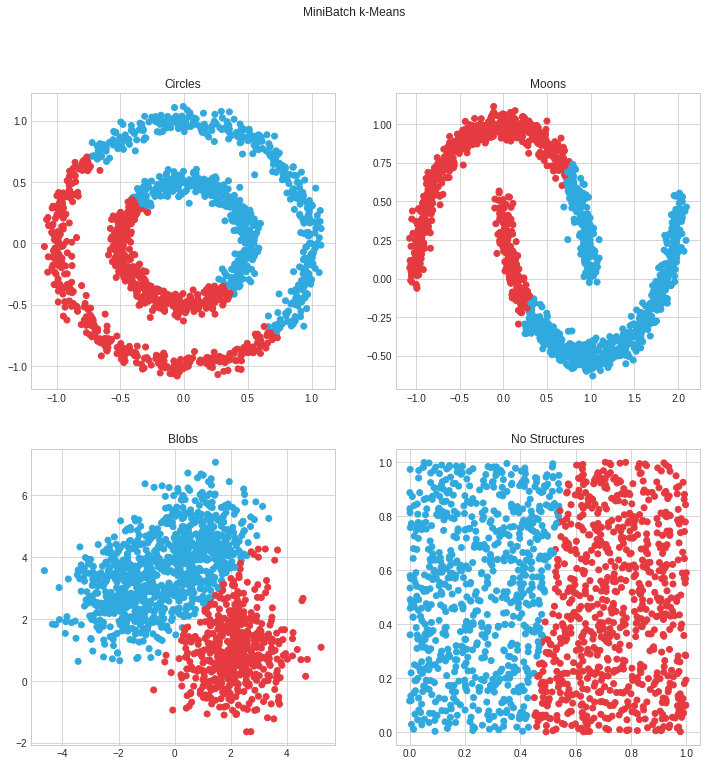

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatch k-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), no_structures, 224, 'No Structures')

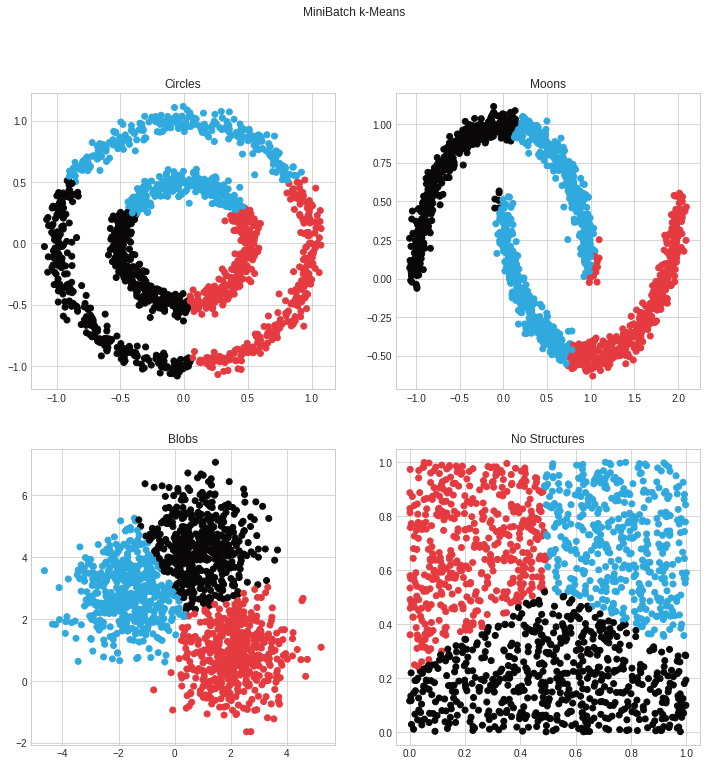

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatch k-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'No Structures')

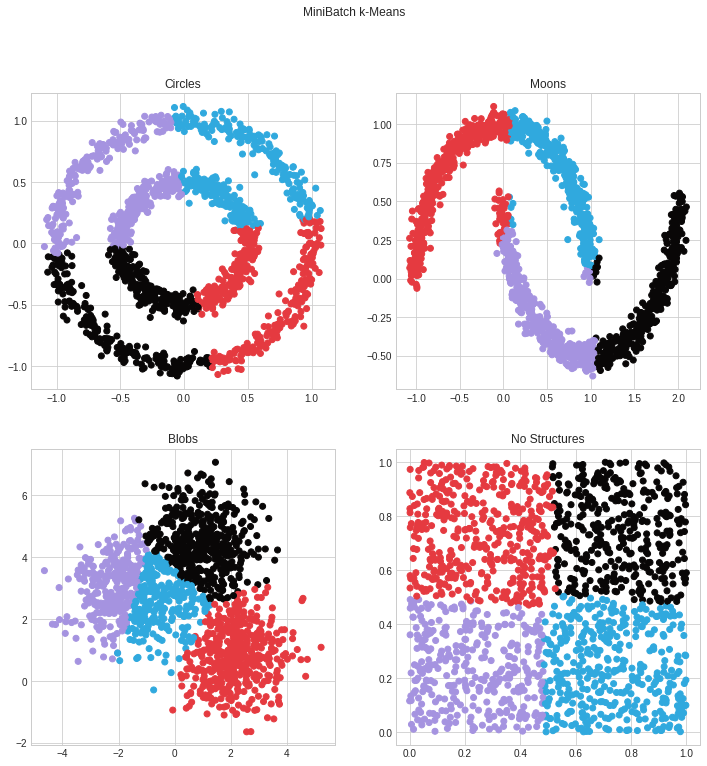

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('MiniBatch k-Means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), no_structures, 224, 'No Structures')

## Affinity Propagation

* 샘플 쌍 끼리 메시지를 보내 군집을 생성
* 샘플을 대표하는 적절한 예를 찾을 때까지 반복
* 군집의 갯수를 자동으로 정함

![affinity propagation](https://scikit-learn.org/stable/_images/sphx_glr_plot_affinity_propagation_0011.png)

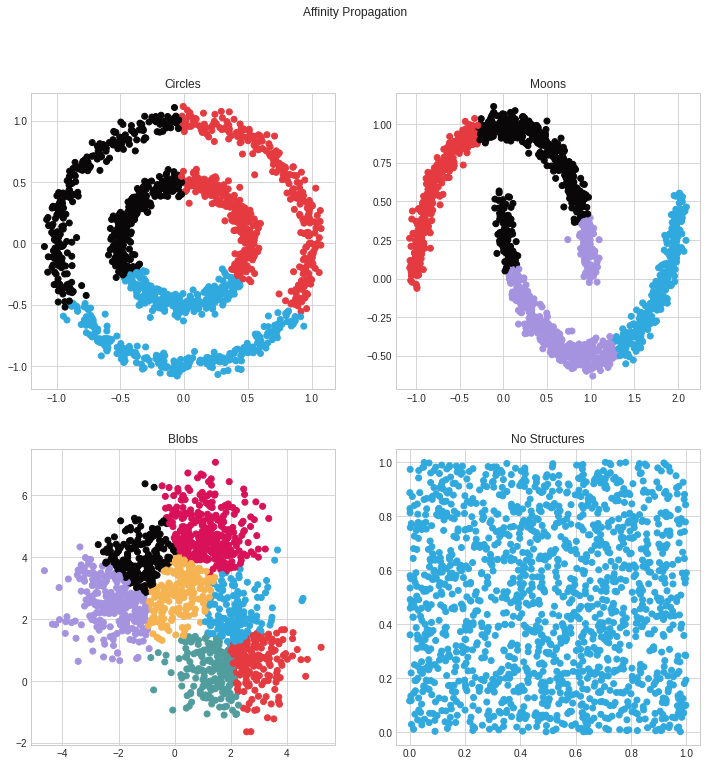

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Affinity Propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200), circles, 221, 'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200), moons, 222, 'Moons')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=.9, preference=-200), no_structures, 224, 'No Structures')

## Mean Shift

* 중심점 후보를 정해진 구역 내 평균으로 업데이트

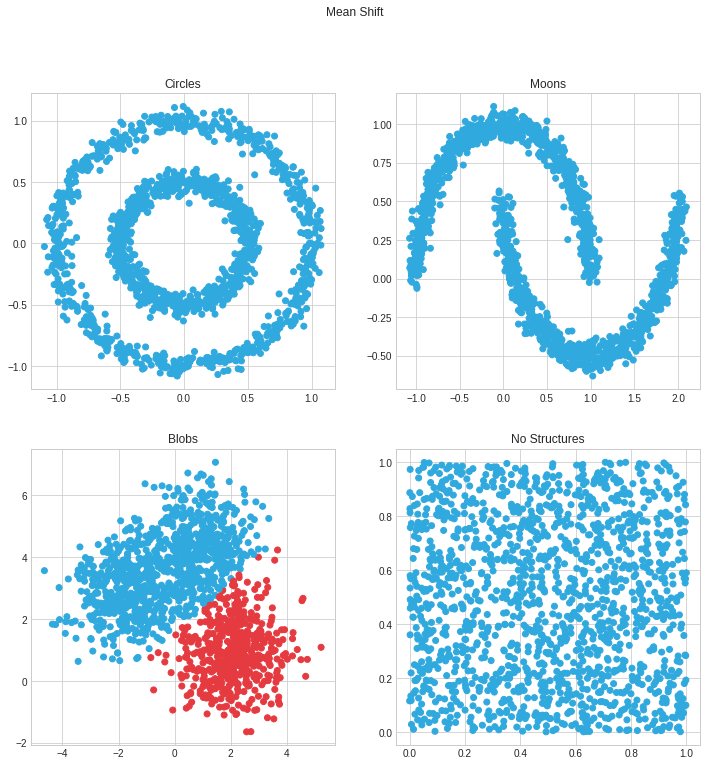

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Mean Shift')

fit_predict_plot(cluster.MeanShift(), circles, 221, 'Circles')
fit_predict_plot(cluster.MeanShift(), moons, 222, 'Moons')
fit_predict_plot(cluster.MeanShift(), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MeanShift(), no_structures, 224, 'No Structures')

## 스펙트럼 군집화 (Spectral Clustering)

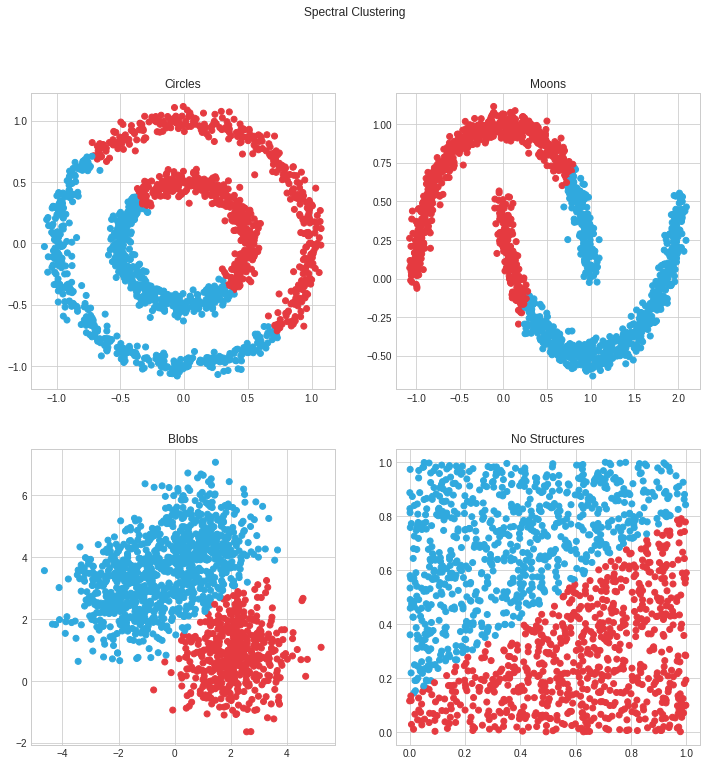

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), no_structures, 224, 'No Structures')

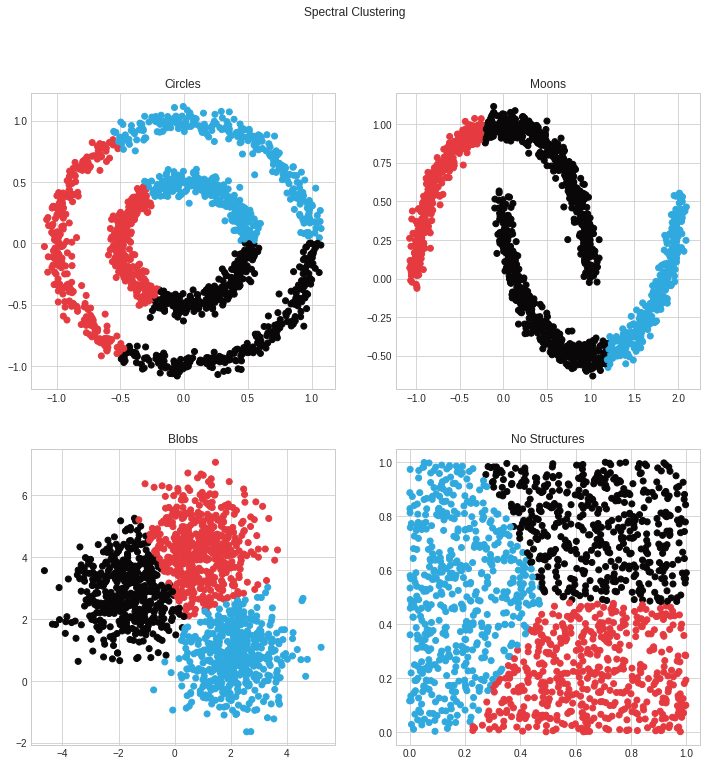

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=3, random_state=random_state), no_structures, 224, 'No Structures')

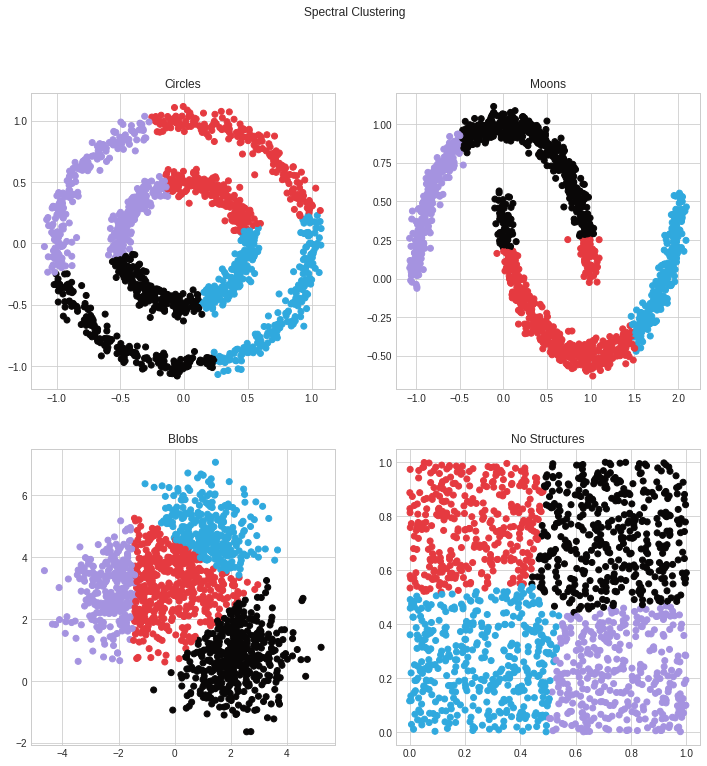

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=4, random_state=random_state), no_structures, 224, 'No Structures')

### 유방암 데이터 군집화

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
model.fit(cancer.data)
predict = model.labels_

In [ ]:
idx = np.where(predict==0)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
idx = np.where(predict==1)
cancer.target[idx]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

## 계층 군집화 (Hierarchical Clustering)

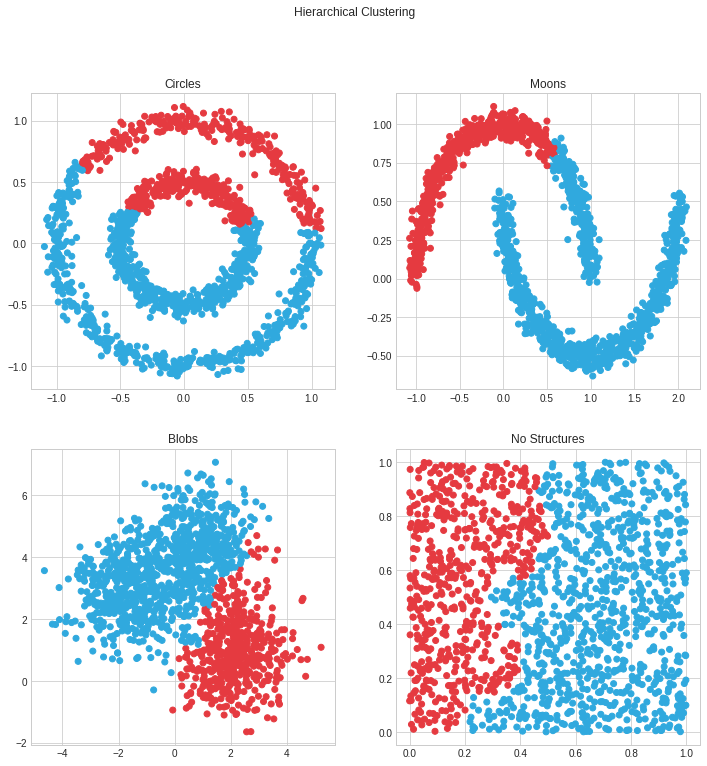

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), no_structures, 224, 'No Structures')

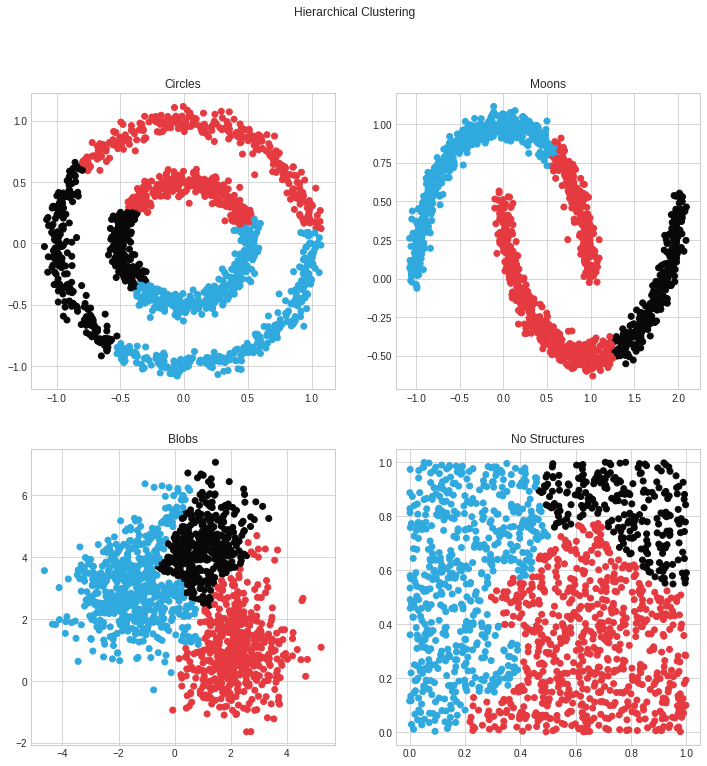

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=3, linkage='ward'), no_structures, 224, 'No Structures')

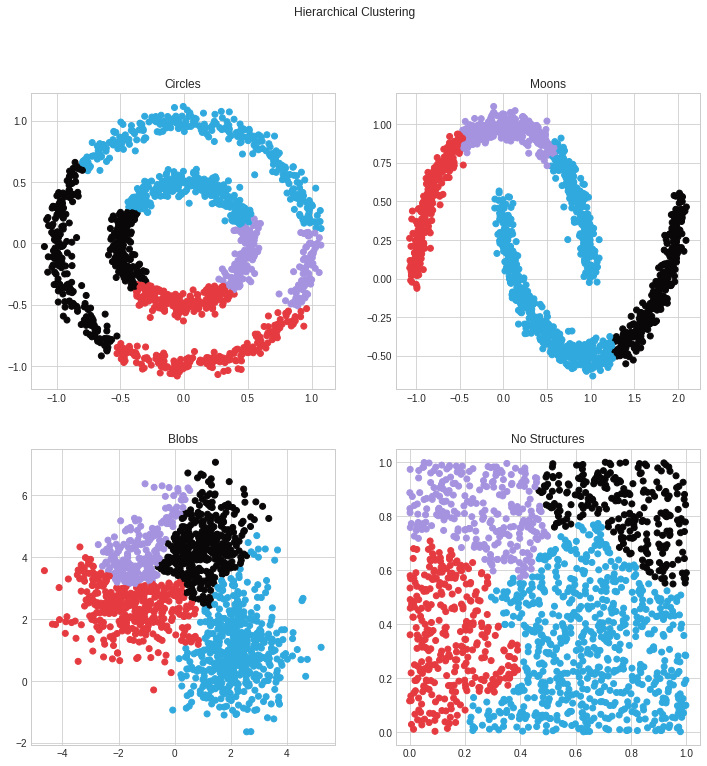

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'), moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=4, linkage='ward'), no_structures, 224, 'No Structures')

### 와인 데이터 군집화

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()

In [ ]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [ ]:
idx = np.where(predict == 0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [ ]:
idx = np.where(predict == 1)
wine.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
idx = np.where(predict == 2)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

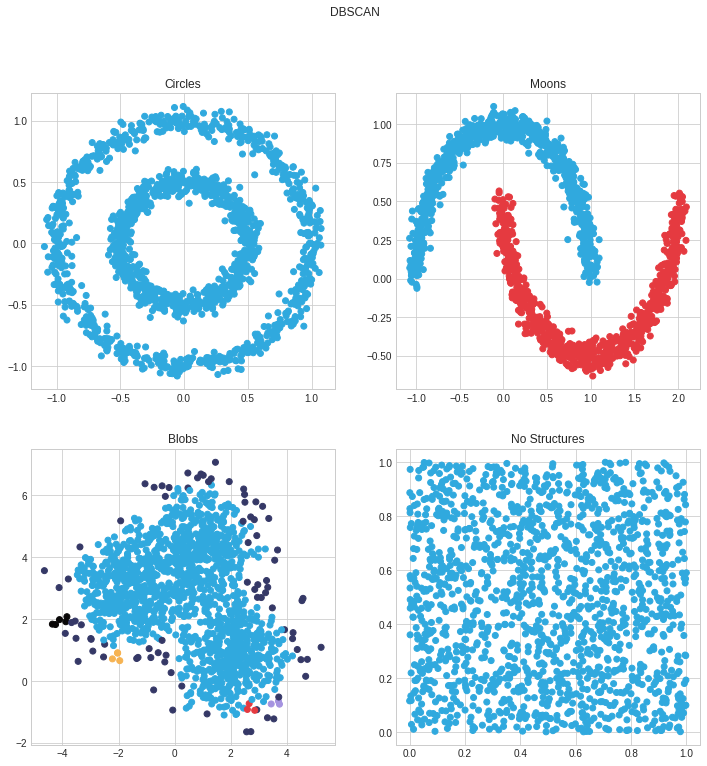

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.DBSCAN(eps=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=.3), no_structures, 224, 'No Structures')

## OPTICS (Ordering Points To Identify the Clustering Structure)

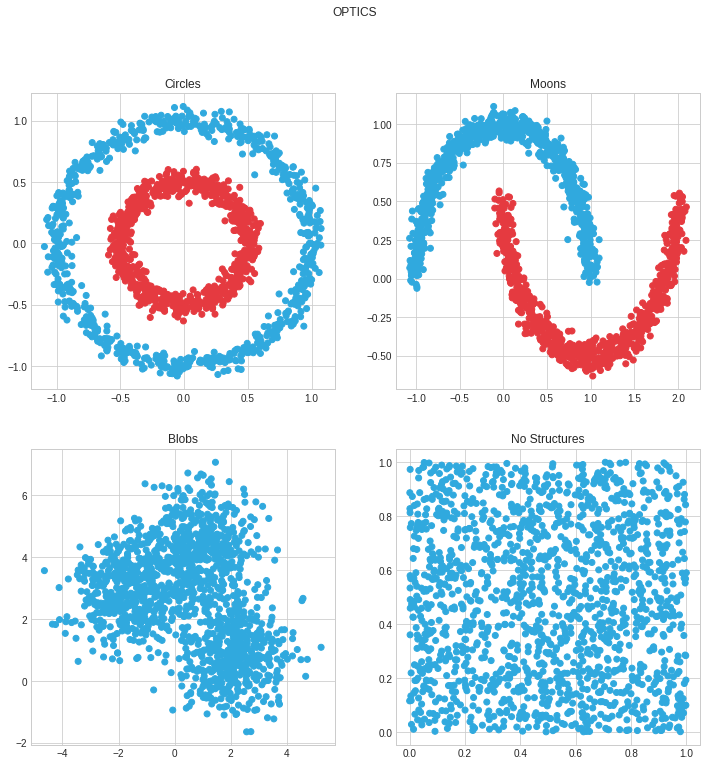

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), circles, 221, 'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), moons, 222, 'Moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), no_structures, 224, 'No Structures')

## Birch (Balanced iterative reducing and clustering using hierarchies)

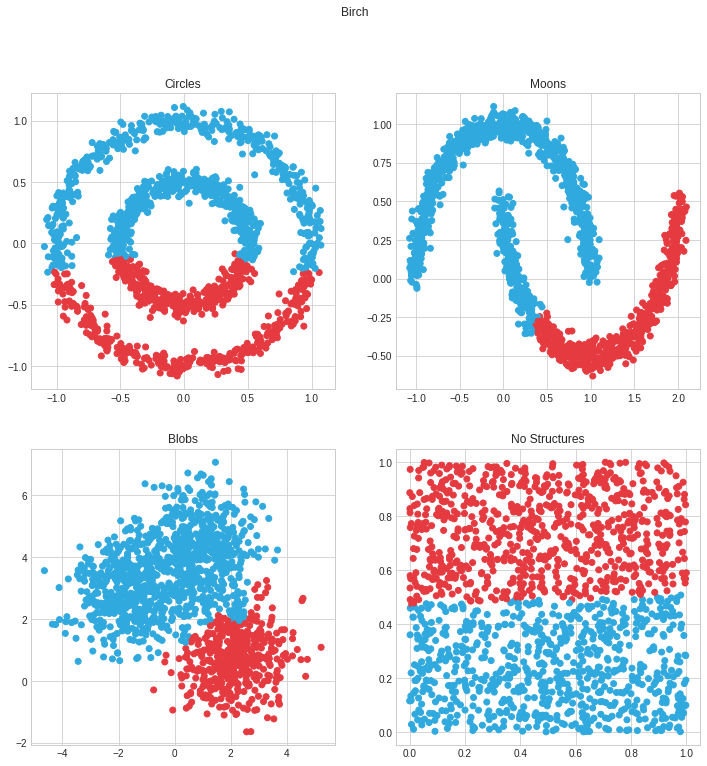

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), no_structures, 224, 'No Structures')

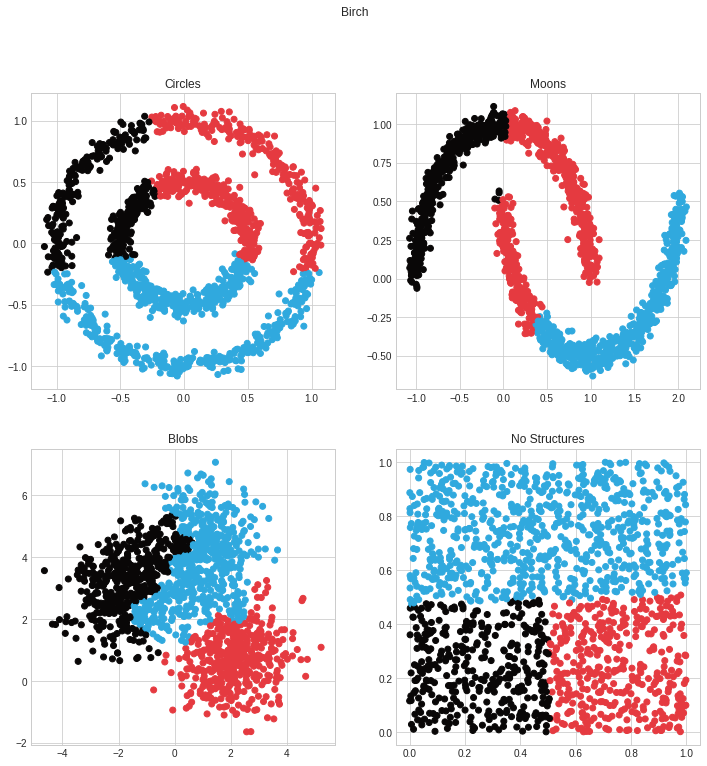

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=3, threshold=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=3, threshold=.3), no_structures, 224, 'No Structures')

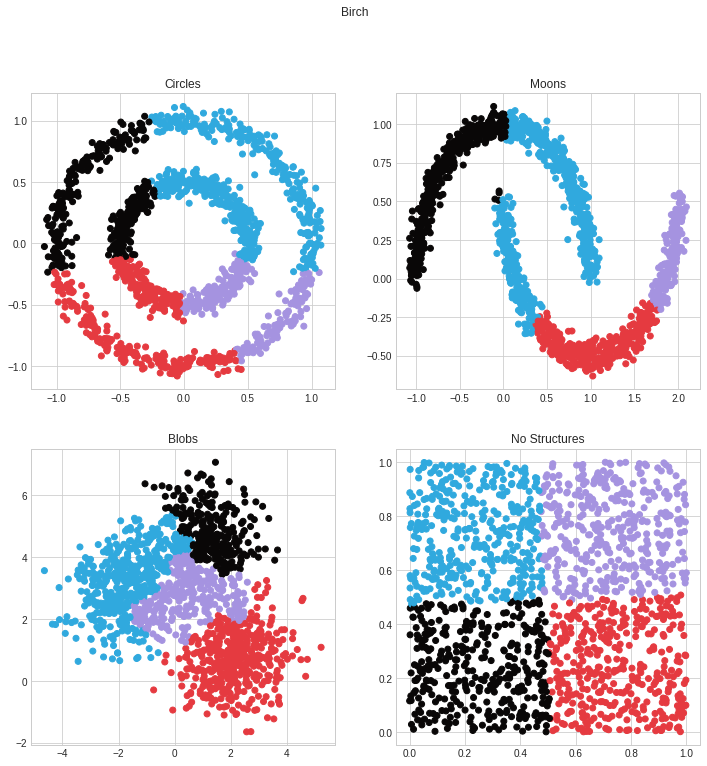

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters=4, threshold=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=4, threshold=.3), no_structures, 224, 'No Structures')

## 손글씨 데이터 군집화

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
X = digits.data.reshape(-1, 8, 8) # 8 X 8 형태
y = digits.target

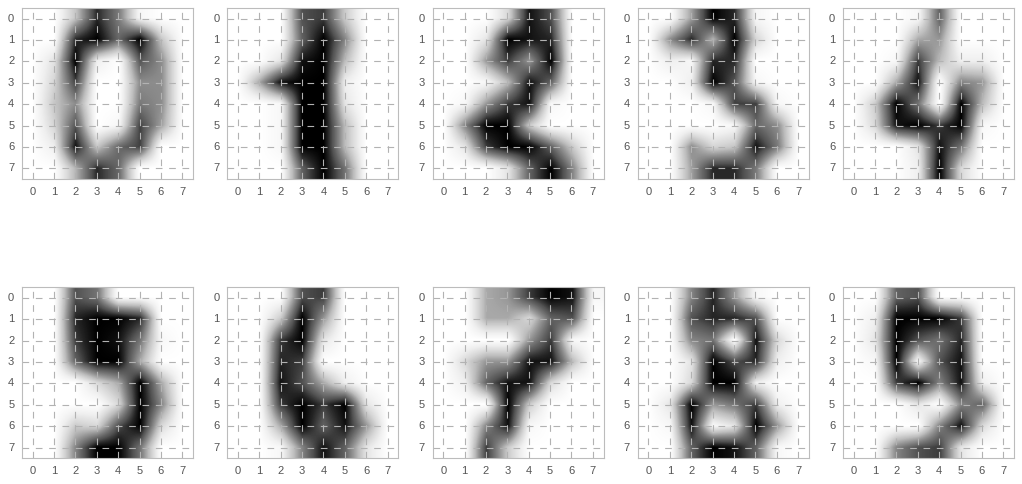

In [ ]:
plt.style.use(['seaborn-notebook'])
plt.figure(figsize=(16, 8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X[i])

### K-Means

In [ ]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 5 8 9 9 5 5 9 9 8 8 5 8 5 8
 8 8 9 9 8 9 9 9 8 9 8 8 3 3 3 9 5 9 9 8 9 8 9 9 8 9 8 3 9 3 5 9 5 9 5 5 9
 9 5 3 3 3 9 9 5 3 3 9 5 9 9 5 9 9 8 8 8 2 8 8 8 9 9 9 9 9 8 9 8 9 9 9 9 9
 8 9 9 8 9 5 8 9 5 8 9 9 5 5 5 9 8 9 5 8 9 5 9 5 8 9 8 9 5 8 5 9 5 9 8 9 8
 9 8 9 9 9 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 5 9 9 9 9 9 9 9 9 9 9 2
 5 9 9 8 9 5 8 9 5 8 9 9 5 5 5 9 8 9 8 5 9 5 9 8 9 8 5 9 5 8 9 8 9 8 9 9 9
 9 9 9 8 9 3 9 9 5 9 5 9 5 9 5 9 9 8]
Cluster 2: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 1 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 5 9 9 5 5 3 5 5 5 5 5 3
 5]
Cluster 3: [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

Cluster: 1


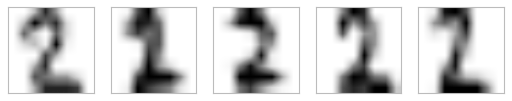

Cluster: 2


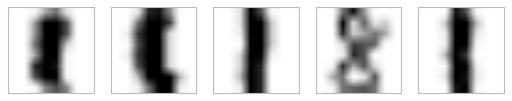

Cluster: 3


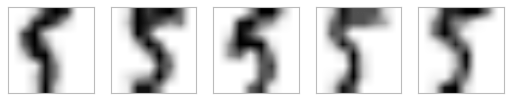

Cluster: 4


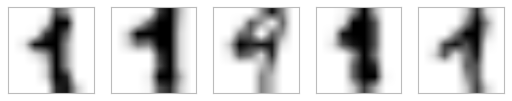

Cluster: 5


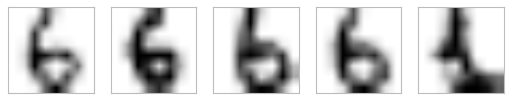

Cluster: 6


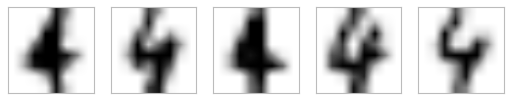

Cluster: 7


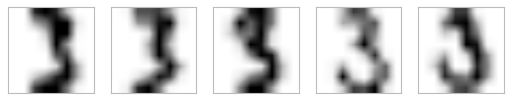

Cluster: 8


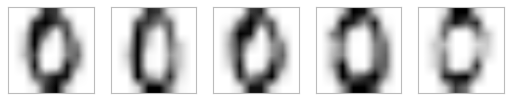

Cluster: 9


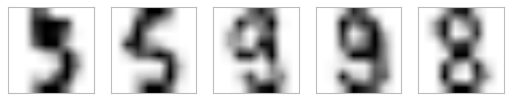

Cluster: 10


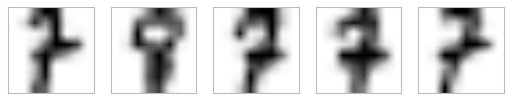

In [ ]:
for i in range(10):

  idx = np.where(predict==i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster: {}'.format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

### Spectral Clustering

In [ ]:
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
spectral.fit(digits.data)
predict = spectral.labels_

array([3, 1, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 8 3 3 9 3 9 3
 9 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 8 3 3 9 8 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3
 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 5 9 9 9 9 3 5 3 3 3 3 9 9 3 3 3 9
 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9
 9 9 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3
 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3
 3 3 3 3 9 9 3 9 3 9 3 9 9 9 9 3 3 9 9 3 3 3 9 3 9 9 9 9]
Cluster 2: [1 2 8 8 8 8 8 2 2 8 2 2 9 2 8 2 1 8 1 3 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 1 8 1 8 1 8 8 8 1 1 8 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 8 8 8 6 2 8 8 8
 8 8 8 8 9 8 8 8 8 8 1 8 8 8 8 8 1 8 1 8 1 8 8 8 1 1 8 1 1 8 1 1 1 1 8 1 1
 8 8 8 8 8 1 8 1 1 8 8 8 1 1 8 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 1 8 1 8 1 8 8 8 1

Cluster: 1


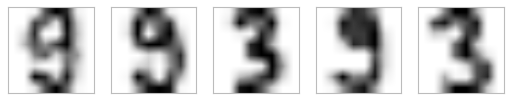

Cluster: 2


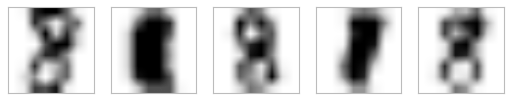

Cluster: 3


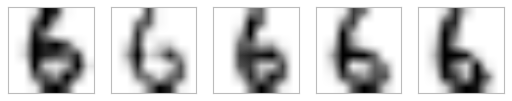

Cluster: 4


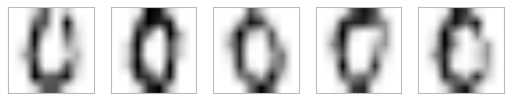

Cluster: 5


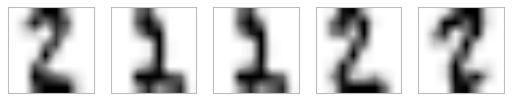

Cluster: 6


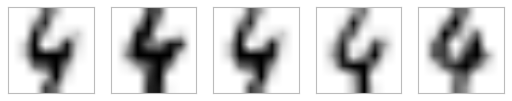

Cluster: 7


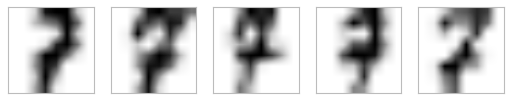

Cluster: 8


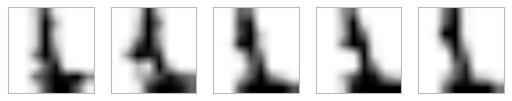

Cluster: 9


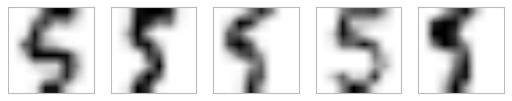

Cluster: 10


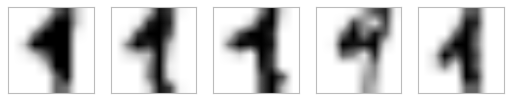

In [ ]:
for i in range(10):

  idx = np.where(predict==i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster: {}'.format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

### Hierarchical Clustering

In [ ]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3

Cluster: 1


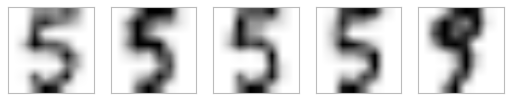

Cluster: 2


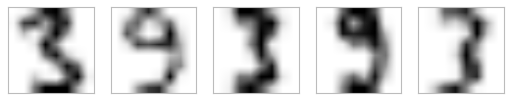

Cluster: 3


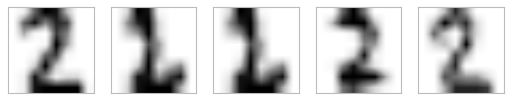

Cluster: 4


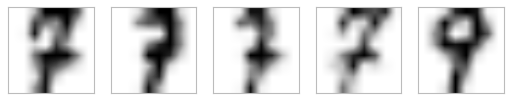

Cluster: 5


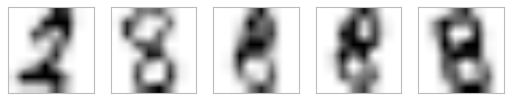

Cluster: 6


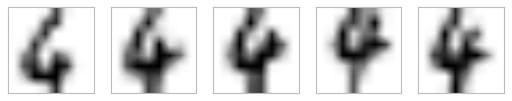

Cluster: 7


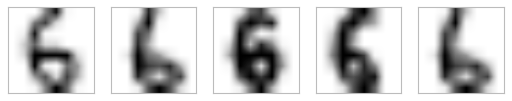

Cluster: 8


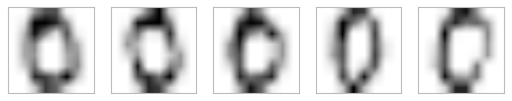

Cluster: 9


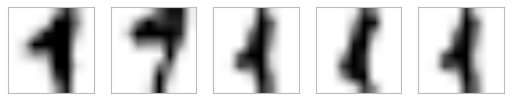

Cluster: 10


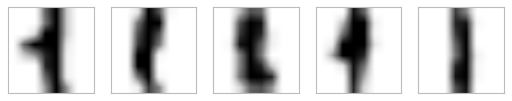

In [ ]:
for i in range(10):

  idx = np.where(predict==i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster: {}'.format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()

### Birch

In [ ]:
birch = cluster.Birch(n_clusters=10, threshold=.3)
birch.fit(digits.data)
predict = birch.labels_

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}: {}'.format(i+1, real_class))

Cluster 1: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2: [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3

Cluster: 1


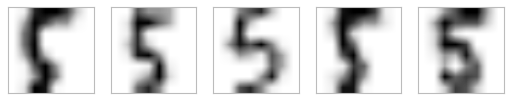

Cluster: 2


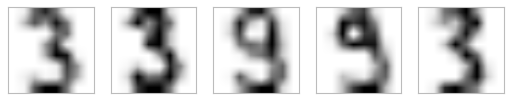

Cluster: 3


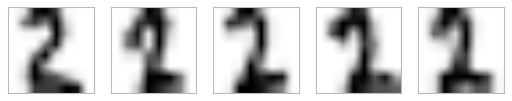

Cluster: 4


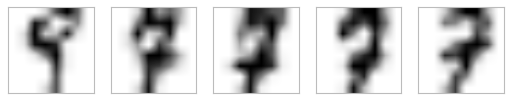

Cluster: 5


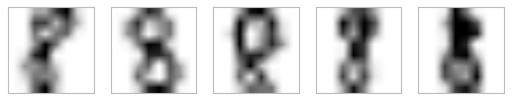

Cluster: 6


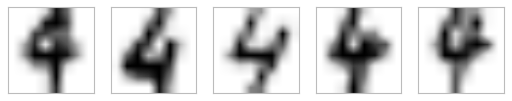

Cluster: 7


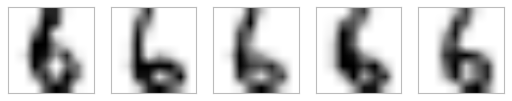

Cluster: 8


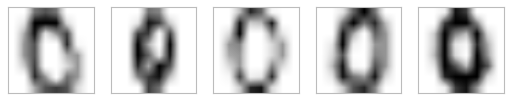

Cluster: 9


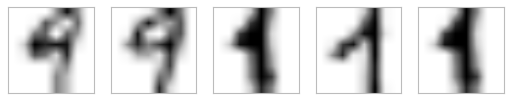

Cluster: 10


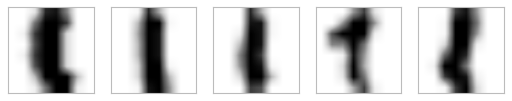

In [ ]:
for i in range(10):

  idx = np.where(predict==i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster: {}'.format(i+1))
  for image in choice_image:
    plt.subplot(1, 5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k += 1

  plt.show()